<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/PredictGlucose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

###Load Data

In [2]:
import pandas as pd
ppg  = pd.read_csv('drive/MyDrive/Dataset/long2aprilgLab1.csv', header=0)

In [4]:
ppg.head

<bound method NDFrame.head of          850nm   640nm   940nm  ...  Channel 6  Channel 7  Channel 8
0       380947 -806209  773997  ...          0          0          0
1       381395 -805884  774766  ...          0          0          0
2       381363 -805342  774999  ...          0          0          0
3       381214 -805496  774037  ...          0          0          0
4       381299 -806230  773079  ...          0          0          0
...        ...     ...     ...  ...        ...        ...        ...
478168  371187 -841453  630152  ...          0          0          0
478169  371830 -840514  631210  ...          0          0          0
478170  371667 -841594  631435  ...          0          0          0
478171  372269 -840656  632480  ...          0          0          0
478172  372691 -840332  634035  ...          0          0          0

[478173 rows x 8 columns]>

### Read PPG at 525nm
 The data contains is sampled at 70hz 
 Because the glucose is sampling at 1 point per 5 minutes
 We need to do following steps:
 + Moving average to reduce the noise
 + Remove spike points
 + Down sampling


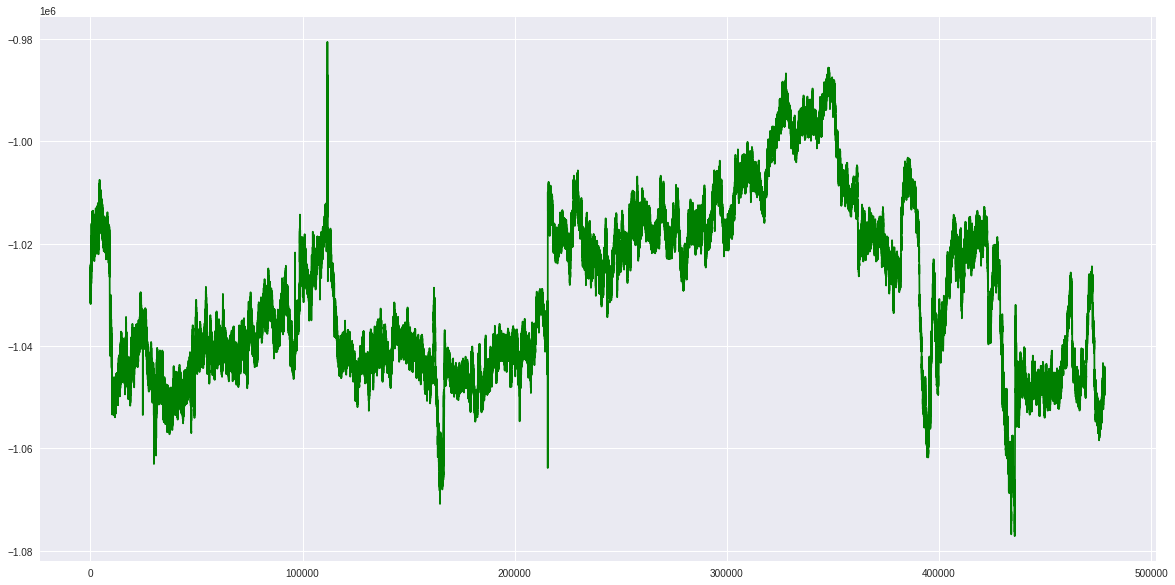

In [3]:
plt.style.use('seaborn')

ppg525 = ppg['580nm']
plt.figure(1, figsize=(20,10))
# colors for the line plot
colors = ['green', 'red', 'purple']

plt.plot(ppg525, "g-", label='PPG at 525nm')



###Moving average the signal


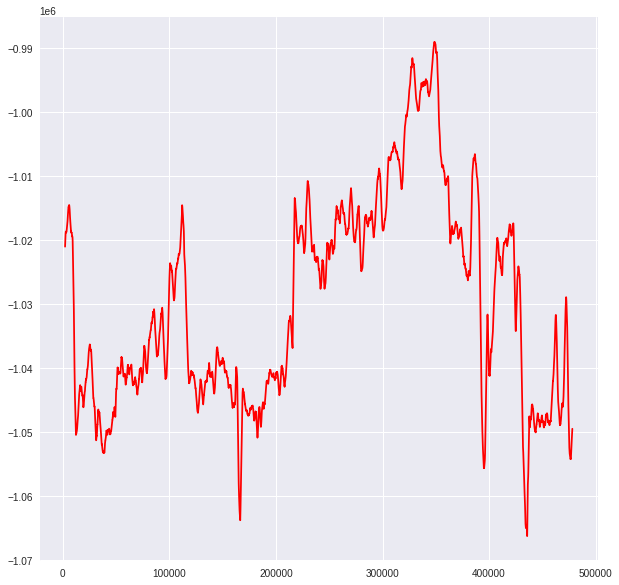

In [4]:
ppgMVA = ppg525.rolling(2000).mean()### windows = 2000 = (sample/second)*(1minutes)*5
plt.figure(1, figsize=(10,10))
plt.plot(ppgMVA, "r-", label='PPG at 525nm')


### Plot both raw and Moving average data

Text(0, 0.5, 'Amplitude')

<Figure size 720x720 with 0 Axes>

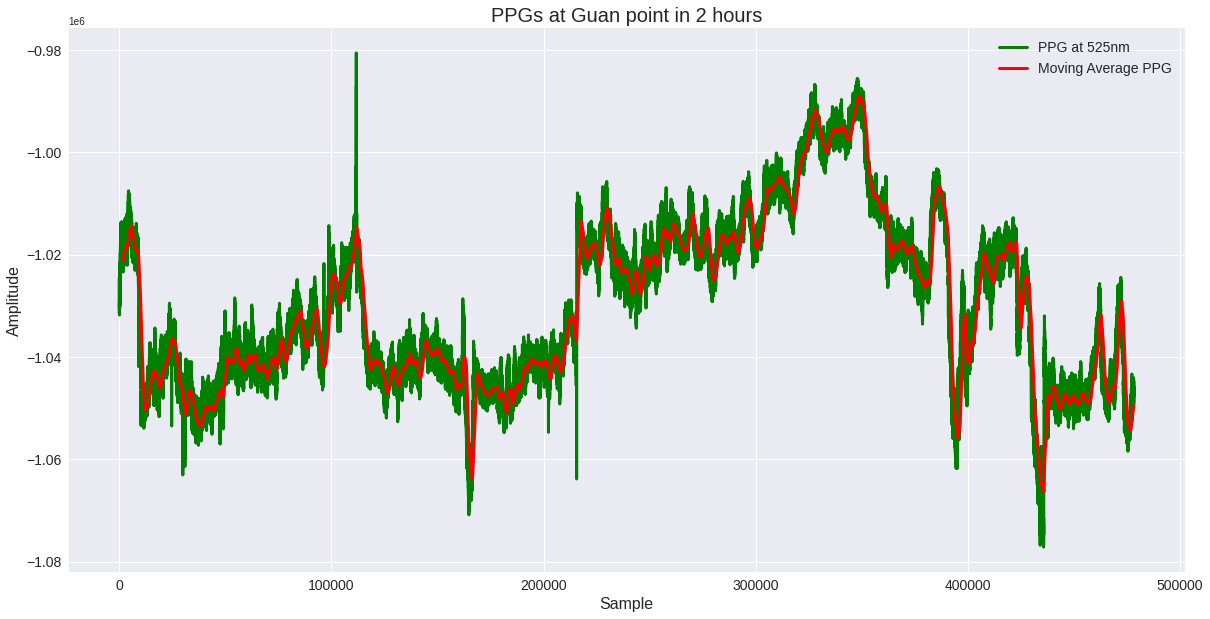

In [5]:
plt.style.use('seaborn')

ppg525 = ppg['580nm']
plt.figure(1, figsize=(10,10))
# colors for the line plot
colors = ['green', 'red', 'purple']

ppgMVA = ppg525.rolling(2000).mean()### windows = 2000 = (sample/second)*(1minutes)*5
### create a combine dataframe
df = pd.DataFrame(ppg525)
df['avg'] = ppgMVA
#plt.plot(ppg525, "g-", label='PPG at 525nm')
#plt.plot(ppgMVA, "r-", label='Moving Average of PPG at 525nm')
df.plot(color=colors, linewidth=3, figsize=(20,10))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['PPG at 525nm', 'Moving Average PPG' ], fontsize=14)

# title and labels
plt.title('PPGs at Guan point in 2 hours', fontsize=20)
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)


### Using Cummulating Moving Average

In [8]:
ppgCMA = ppg525.expanding().mean()
df['CMA'] = ppgCMA

Text(0, 0.5, 'Amplitude')

<Figure size 720x720 with 0 Axes>

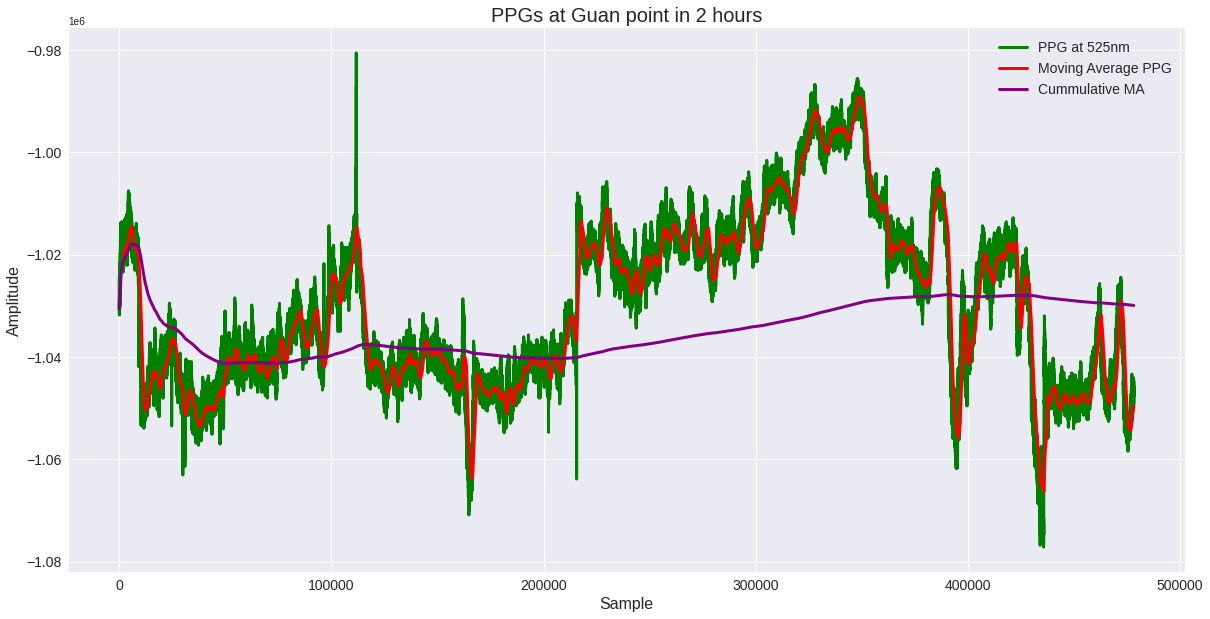

In [7]:
plt.figure(1, figsize=(10,10))
# colors for the line plot
colors = ['green', 'red', 'purple']

df.plot(color=colors, linewidth=3, figsize=(20,10))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['PPG at 525nm', 'Moving Average PPG', 'Cummulative MA' ], fontsize=14)

# title and labels
plt.title('PPGs at Guan point in 2 hours', fontsize=20)
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)

### Using Exponent moving averages

In [8]:
ppgEMA0 = df['avg'].ewm(alpha=0.1, adjust= False).mean()
ppgEMA1 = df['avg'].ewm(alpha=0.3, adjust= False).mean()
df['EMA_0.1'] = ppgEMA0
df['EMA_0.3'] = ppgEMA1

Text(0, 0.5, 'Amplitude')

<Figure size 720x720 with 0 Axes>

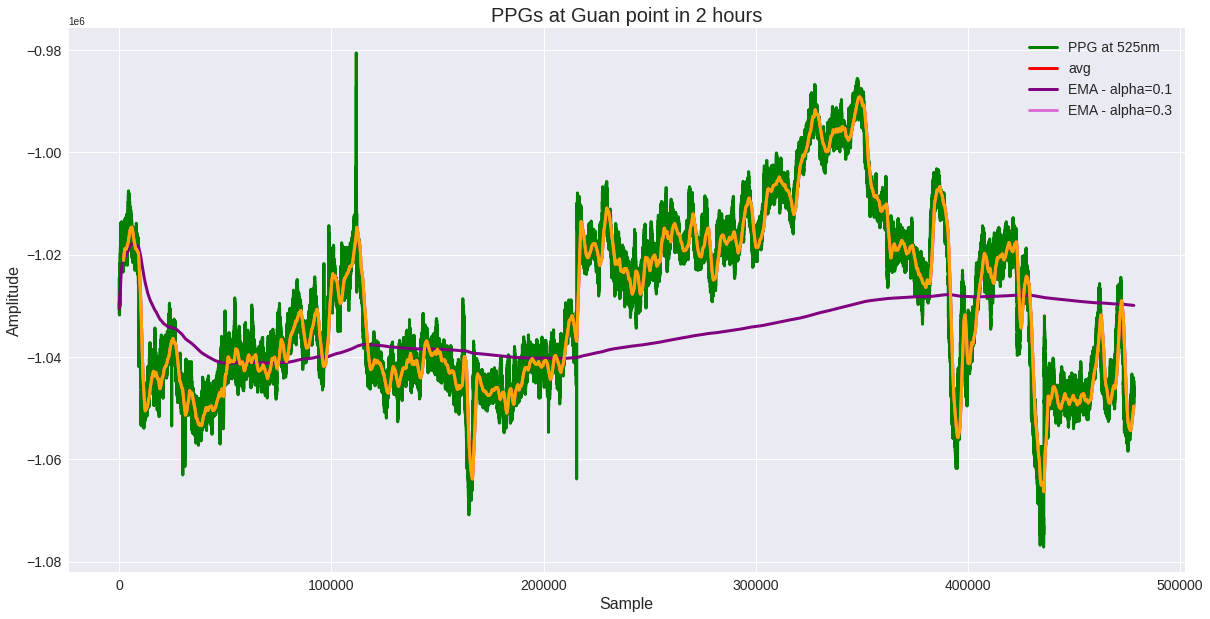

In [ ]:
plt.figure(1, figsize=(10,10))
# colors for the line plot
colors = ['green', 'red', 'purple', 'orchid', 'orange']

df.plot(color=colors, linewidth=3, figsize=(20,10))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['PPG at 525nm', 'avg', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('PPGs at Guan point in 2 hours', fontsize=20)
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)

In [ ]:
df.head()

,580nm,avg,CMA,EMA_0.1,EMA_0.3
0,-1030610.0,NaN,-1.030610e+06,NaN,NaN
1,-1030310.0,NaN,-1.030460e+06,NaN,NaN
2,-1030570.0,NaN,-1.030497e+06,NaN,NaN
3,-1030260.0,NaN,-1.030438e+06,NaN,NaN
4,-1030070.0,NaN,-1.030364e+06,NaN,NaN


### Median Filter (should not use)

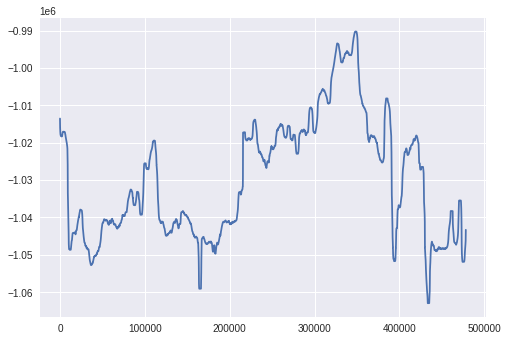

In [ ]:
import scipy

data =np.reshape(df['580nm'], len(df['580nm']))
ppgfilt = scipy.signal.medfilt(data, kernel_size= 4901)

plt.plot(ppgfilt)

### Down sampling

In [15]:
def smooth(x,window_len=11, window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


RUN READING GLUCOSE FIRST 

In [16]:
#step = 2100
#### Must run Glu_DSP 
step = len(df)//len(glu_DSP)
a = np.arange(0,len(df['avg']), step)
dataDSP = df['avg'][a]
#remove nan
#dataDSP = dataDSP[1:]
dataDSP = dataDSP.dropna(how="all")

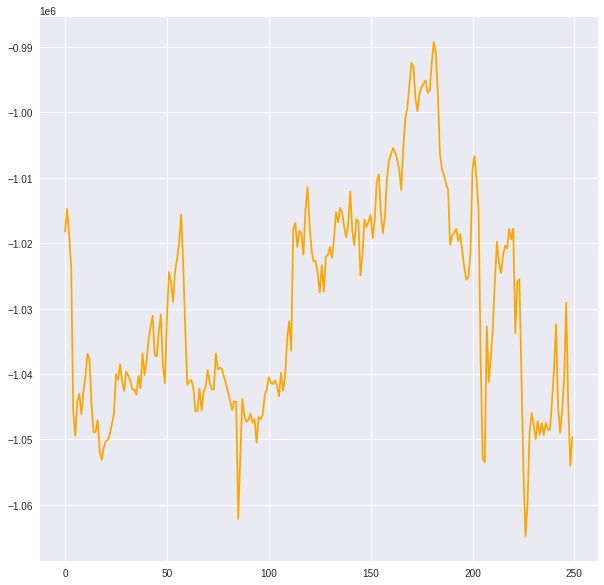

In [17]:
plt.figure(1, figsize=(10,10))
x = range(len(dataDSP))
plt.plot(x,dataDSP, "b-", label='PPG at 525nm', color='orange')

#plt.plot(dataDSP)

In [31]:
len(dataDSP)

250

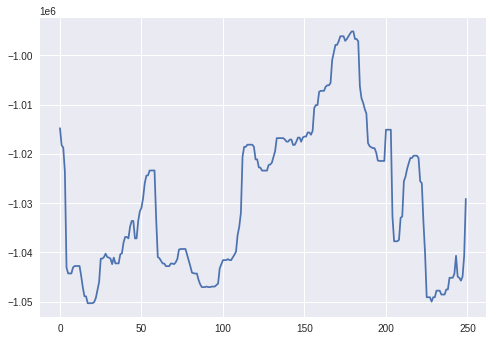

In [16]:
import scipy

data2 =np.reshape(dataDSP, len(dataDSP))
ppgfilt = scipy.signal.medfilt(data2, kernel_size= 7)

plt.plot(ppgfilt)

###Savitzky Golay

In [18]:
from scipy.signal import savgol_filter
yhat = [savgol_filter(dataDSP, 45, i, mode='wrap') for i in range(3,8,2)]# window size 51, polynomial order 3


In [ ]:
yhat

###Import color

In [19]:
import seaborn as sns
colors = sns.color_palette("husl", 8)
colors = sns.color_palette("tab10")

In [11]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

(RUN it get df_yhat)

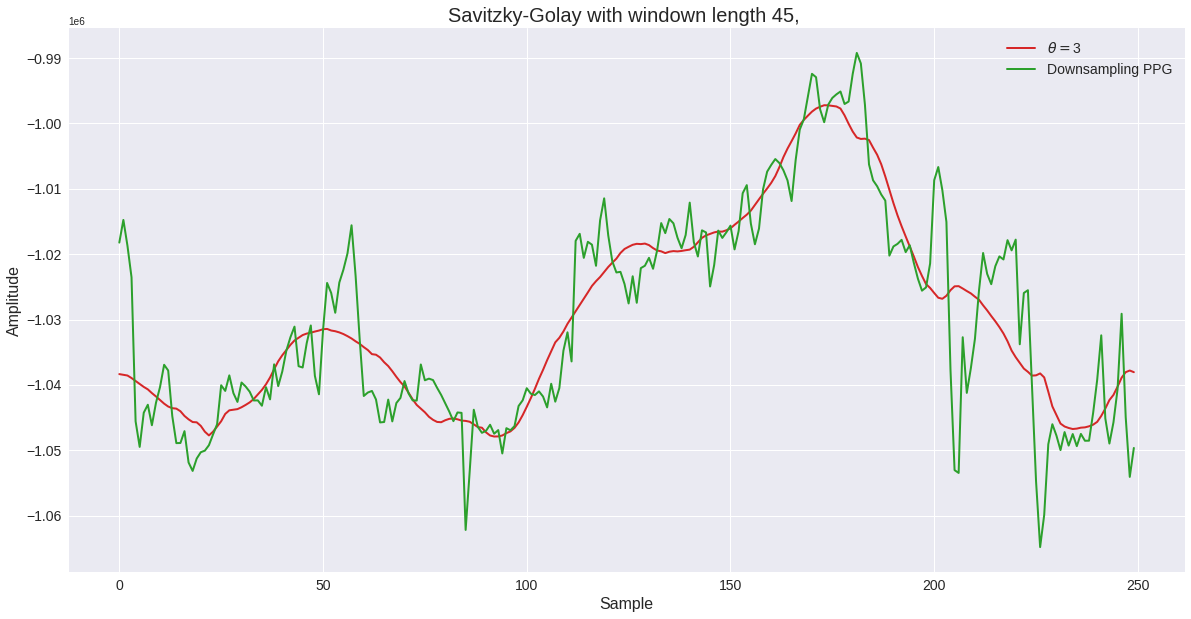

In [20]:
plt.figure(1, figsize=(20,10))
x = range(0, len(dataDSP))
df_yhat = pd.DataFrame(yhat)
df_yhat = df_yhat.T  ## transpose data to right dimention

position = 2
df_yhat.insert(position, 'Origin', dataDSP.values)
#plt.plot(dataDSP)
#plt.plot(x,df_yhat[0], "b-", label=r'$\theta= 3$')

df_yhat[0].plot(color=colors[3], linewidth=2, figsize=(20,10))
df_yhat['Origin'].plot(color=colors[2], linewidth=2, figsize=(20,10))
#plt.plot(yhat)
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
labels = [r'$\theta=$'+ str(x) for x in range(3,8,2) ]
labels.insert(position,'Downsampling PPG')
plt.legend(labels =[labels[0],labels[2]], fontsize=14)

# title and labels
plt.title('Savitzky-Golay with windown length 45, ', fontsize=20)
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.show()

##Reading Glucose Data


In [21]:
from pandas import read_csv
file_path = file_path = 'drive/My Drive/Dataset/GlucoseLong02_02April.csv'
dataset = read_csv(file_path,
                   
                   parse_dates=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
                   index_col=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
                   skiprows= [i for i in range(1,11)],
                   na_values= ['nan'])

In [22]:
dataset['Glucose Value (mg/dL)'][0]

126.0

### show data

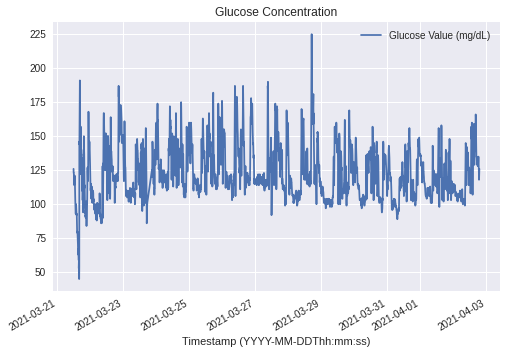

In [23]:
import matplotlib.pyplot as plt
dataset.plot(y='Glucose Value (mg/dL)', title='Glucose Concentration')
plt.show()

###Function to find index in time series
(Do it before run down sampling)

In [9]:
import numpy
def find_index(dataset, time):
   s = [index for index in range(len(dataset.index.values)) if dataset.index.values[index] == numpy.datetime64(time)]
   return s[0]

In [10]:
x_start = find_index(dataset, '2021-04-02T15:09:40')
x_stop = find_index(dataset, '2021-04-02T17:19:40')

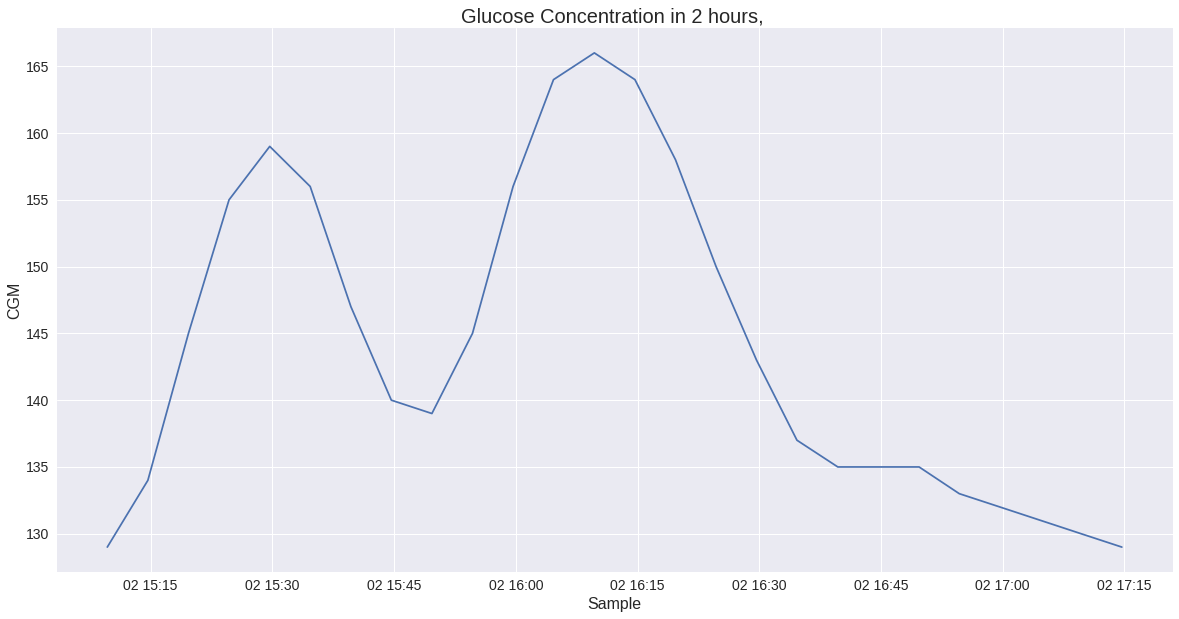

In [11]:
df_glu = dataset['Glucose Value (mg/dL)'][x_start:x_stop]
plt.figure(1, figsize=(20,10))
plt.plot(df_glu)
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# title and labels
plt.title('Glucose Concentration in 2 hours, ', fontsize=20)
plt.xlabel('Sample', fontsize=16)
plt.ylabel('CGM', fontsize=16)
plt.show()

# Using tslearn package to find similarity

* install tslearn
* analyze similarity

In [12]:
!pip install tslearn

In [55]:
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.preprocessing import StandardScaler
from tslearn import metrics

### Findsimilarity

(RUN to get glu_DSP)

Text(0, 0.5, 'Scaled Amplitude')

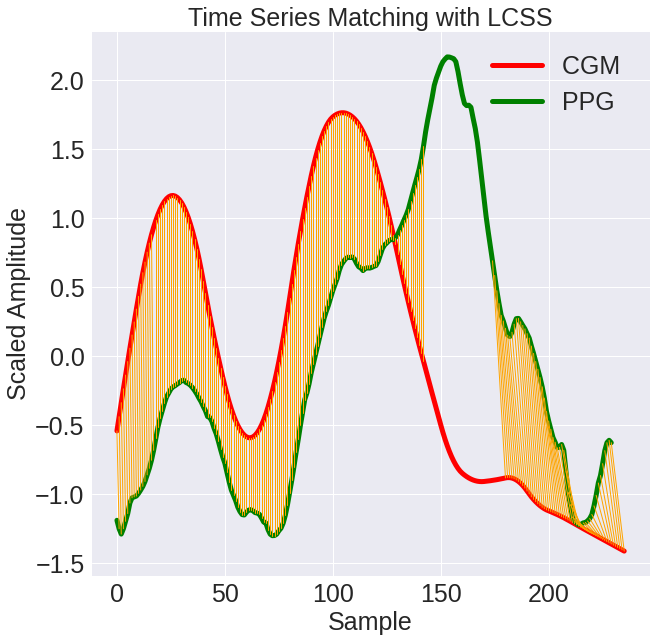

In [103]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) 
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) 
### Upsampling glucose data to 1 sps
upsampled = df_glu.resample('s')
itp_glu = upsampled.interpolate(method='polynomial', order=2)
### Downsampling to 1 sample per 30 seconds
step = 30
a = np.arange(0,len(itp_glu), step)
glu_DSP = itp_glu[a]

### rescaling data
s1 = scaler.fit_transform([glu_DSP[15:]]) #[15:130]
s1 = s1.reshape(s1.size)
s2 = scaler.fit_transform([df_yhat[0][20:]]) ### SG filter with theta = 3  [25:140]
s2 = s2.reshape(s2.size)
#data = glu_DSP.values                            

lcss_path, sim_lcss = metrics.lcss_path(s1,s2, eps=1.60 ,global_constraint="sakoe_chiba", sakoe_chiba_radius=3)                                      
dtw_path, sim_dtw = metrics.dtw_path(s1, s2)

plt.figure(1, figsize=(10,10))
#plt.legend(loc=1, prop={'size': 40})
plt.rc('legend',fontsize=25)
plt.plot(s1, "r-", label='CGM ', linewidth = 5)
plt.plot(s2, "g-", label='PPG', linewidth = 5)

for positions in lcss_path:
    plt.plot([positions[0], positions[1]],
             [s1[positions[0]], s2[positions[1]]], color='orange', linewidth = 1)
plt.legend()
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.title("Time Series Matching with LCSS",fontsize=25)
plt.xlabel('Sample', fontsize=25)
plt.ylabel('Scaled Amplitude', fontsize=25)

In [ ]:
### Upsampling glucose data
upsampled = df_glu.resample('s')
itp_glu = upsampled.interpolate(method='polynomial', order=2)

step = 30
a = np.arange(0,len(itp_glu), step)
glu_DSP = itp_glu[a]

## **Linear regression**

### Check the length of two time series

In [58]:
len(glu_DSP), len(df_yhat) ### Groud truth, PPG data

(251, 250)

### Extract the most similarity

* Data

In [73]:
Y_GLC =[ x for x in glu_DSP[15:]]  # 15:130
X_PPG = [x for x in  df_yhat[0][20:]] # 25:140

len(Y_GLC), len(X_PPG)

(236, 230)

In [84]:
Y_GLC =[Y_GLC[position[0]] for position in lcss_path if position[0] < 120 ]
X_PPG = [X_PPG[position[1]] for position in lcss_path if position[0] < 120]
len(Y_GLC), len(X_PPG)

(119, 119)

In [ ]:
for position in lcss_path:
  print(position)

In [104]:
sim_lcss

0.8608695652173913

* Training model

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
# define min max scaler
def scaling(signal):
  scaler = StandardScaler()
  Xscaled = scaler.fit_transform(signal)
  return Xscaled  
# Reshape the data  
X = numpy.array(X_PPG).reshape(-1,1)
Y = numpy.array(Y_GLC).reshape(-1,1)
Xscaled = scaling(X)
X_train, X_test, y_train, y_test = train_test_split(Xscaled, Y, test_size=0.3, random_state=1)
model = LinearRegression()
reg = model.fit(X_train, y_train)  # perform linear regression
Y_pred = model.predict(X_test)


In [106]:
np.mean(Y_pred - y_test)

1.1690746234002125

### The coeficients of Y = a*X + b
*a:  use the function reg.coef_
*b:  use the function reg.intercept_

In [107]:
reg.coef_, reg.intercept_

(array([[8.2505553]]), array([153.17155368]))

In [88]:
scaler = StandardScaler()
a = scaler.fit_transform(X)

In [108]:
reg.score(X_test, y_test), reg.score(X_train, y_train)

(0.8540300776069201, 0.8291960938167541)

In [ ]:
for i in zip(Y_pred, y_test):
  print(i)

##Implementation of Clarke and Parkes error grid analysis


In [60]:
"""
"""

import numpy as np

def clarke_error_zone_detailed(act, pred):
    """
    This function outputs the Clarke Error Grid region (encoded as integer)
    for a combination of actual and predicted value
    Based on 'Evaluating clinical accuracy of systems for self-monitoring of blood glucose':
    https://care.diabetesjournals.org/content/10/5/622
    """
    # Zone A
    if (act < 70 and pred < 70) or abs(act - pred) < 0.2 * act:
        return 0
    # Zone E - left upper
    if act <= 70 and pred >= 180:
        return 8
    # Zone E - right lower
    if act >= 180 and pred <= 70:
        return 7
    # Zone D - right
    if act >= 240 and 70 <= pred <= 180:
        return 6
    # Zone D - left
    if act <= 70 <= pred <= 180:
        return 5
    # Zone C - upper
    if 70 <= act <= 290 and pred >= act + 110:
        return 4
    # Zone C - lower
    if 130 <= act <= 180 and pred <= (7/5) * act - 182:
        return 3
    # Zone B - upper
    if act < pred:
        return 2
    # Zone B - lower
    return 1

def parkes_error_zone_detailed(act, pred, diabetes_type):
    """
    This function outputs the Parkes Error Grid region (encoded as integer)
    for a combination of actual and predicted value
    for type 1 and type 2 diabetic patients
    Based on the article 'Technical Aspects of the Parkes Error Grid':
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3876371/
    """
    def above_line(x_1, y_1, x_2, y_2, strict=False):
        if x_1 == x_2:
            return False

        y_line = ((y_1 - y_2) * act + y_2 * x_1 - y_1 * x_2) / (x_1 - x_2)
        return pred > y_line if strict else pred >= y_line

    def below_line(x_1, y_1, x_2, y_2, strict=False):
        return not above_line(x_1, y_1, x_2, y_2, not strict)

    def parkes_type_1(act, pred):
        # Zone E
        if above_line(0, 150, 35, 155) and above_line(35, 155, 50, 550):
            return 7
        # Zone D - left upper
        if (pred > 100 and above_line(25, 100, 50, 125) and
                above_line(50, 125, 80, 215) and above_line(80, 215, 125, 550)):
            return 6
        # Zone D - right lower
        if (act > 250 and below_line(250, 40, 550, 150)):
            return 5
        # Zone C - left upper
        if (pred > 60 and above_line(30, 60, 50, 80) and
                above_line(50, 80, 70, 110) and above_line(70, 110, 260, 550)):
            return 4
        # Zone C - right lower
        if (act > 120 and below_line(120, 30, 260, 130) and below_line(260, 130, 550, 250)):
            return 3
        # Zone B - left upper
        if (pred > 50 and above_line(30, 50, 140, 170) and
                above_line(140, 170, 280, 380) and (act < 280 or above_line(280, 380, 430, 550))):
            return 2
        # Zone B - right lower
        if (act > 50 and below_line(50, 30, 170, 145) and
                below_line(170, 145, 385, 300) and (act < 385 or below_line(385, 300, 550, 450))):
            return 1
        # Zone A
        return 0

    def parkes_type_2(act, pred):
        # Zone E
        if (pred > 200 and above_line(35, 200, 50, 550)):
            return 7
        # Zone D - left upper
        if (pred > 80 and above_line(25, 80, 35, 90) and above_line(35, 90, 125, 550)):
            return 6
        # Zone D - right lower
        if (act > 250 and below_line(250, 40, 410, 110) and below_line(410, 110, 550, 160)):
            return 5
        # Zone C - left upper
        if (pred > 60 and above_line(30, 60, 280, 550)):
            return 4
        # Zone C - right lower
        if (below_line(90, 0, 260, 130) and below_line(260, 130, 550, 250)):
            return 3
        # Zone B - left upper
        if (pred > 50 and above_line(30, 50, 230, 330) and
                (act < 230 or above_line(230, 330, 440, 550))):
            return 2
        # Zone B - right lower
        if (act > 50 and below_line(50, 30, 90, 80) and below_line(90, 80, 330, 230) and
                (act < 330 or below_line(330, 230, 550, 450))):
            return 1
        # Zone A
        return 0

    if diabetes_type == 1:
        return parkes_type_1(act, pred)

    if diabetes_type == 2:
        return parkes_type_2(act, pred)

    raise Exception('Unsupported diabetes type')

clarke_error_zone_detailed = np.vectorize(clarke_error_zone_detailed)
parkes_error_zone_detailed = np.vectorize(parkes_error_zone_detailed)

def zone_accuracy(act_arr, pred_arr, mode='clarke', detailed=False, diabetes_type=1):
    """
    Calculates the average percentage of each zone based on Clarke or Parkes
    Error Grid analysis for an array of predictions and an array of actual values
    """
    acc = np.zeros(9)
    if mode == 'clarke':
        res = clarke_error_zone_detailed(act_arr, pred_arr)
    elif mode == 'parkes':
        res = parkes_error_zone_detailed(act_arr, pred_arr, diabetes_type)
    else:
        raise Exception('Unsupported error grid mode')

    acc_bin = np.bincount(res)
    acc[:len(acc_bin)] = acc_bin

    if not detailed:
        acc[1] = acc[1] + acc[2]
        acc[2] = acc[3] + acc[4]
        acc[3] = acc[5] + acc[6]
        acc[4] = acc[7] + acc[8]
        acc = acc[:5]

    return acc / sum(acc)

## Plot Clarke Grid Error

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("husl", 8)
colors = sns.color_palette("tab10")

#This function takes in the reference values and the prediction values as lists and returns a list with each index corresponding to the total number
#of points within that zone (0=A, 1=B, 2=C, 3=D, 4=E) and the plot
def clarke_error_grid(ref_values, pred_values, title_string):

    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))

    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
    if max(ref_values) > 400 or max(pred_values) > 400:
        print("Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values)))
    if min(ref_values) < 0 or min(pred_values) < 0:
        print("Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values)))

    #Clear plot
    plt.clf()

    #Set up plot
    
    plt.scatter(ref_values, pred_values, marker='o', color= colors[3], s=25)
    plt.title(title_string + " Clarke Error Grid", color = 'black', fontsize = 25)
    plt.xlabel("Reference Concentration (mg/dl)", fontsize = 25)
    plt.ylabel("Prediction Concentration (mg/dl)", fontsize = 25)
    plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400],fontsize = 25)
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400],fontsize = 25)
    #plt.grid()
    plt.gca().set_facecolor('white')

    #Set axes lengths
    plt.gca().set_xlim([0, 400])
    plt.gca().set_ylim([0, 400])
    plt.gca().set_aspect((400)/(400))
    
    
    #Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      #Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    #plt.plot([175/3, 320], [70, 400], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    # plt.plot([70, 70], [0, 175/3], '-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 400],[175/3, 320],'-', c='black')
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')

    plt.plot([400, 400], [0, 400], ':', c='black')
    plt.plot([0, 0], [0, 400], '-', c='black')            # y_axis
    plt.plot([0, 400], [0, 0], '-', c='black')            # x_axis
    plt.grid(axis='both', linestyle=':', color='0.15')
    #Add zone titles
    plt.text(30, 15, "A", fontsize=50, color =colors[2])
    plt.text(370, 260, "B", fontsize=50, color =colors[0])
    plt.text(280, 370, "B", fontsize=50, color =colors[0])
    plt.text(160, 370, "C", fontsize=50, color =colors[9])
    plt.text(160, 15, "C", fontsize=50, color =colors[9])
    plt.text(30, 140, "D", fontsize=50, color =colors[1])
    plt.text(370, 120, "D", fontsize=50, color =colors[1])
    plt.text(30, 370, "E", fontsize=50, color =colors[3])
    plt.text(370, 15, "E", fontsize=50, color =colors[3])

    #Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A

        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E

        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B

    return plt, zone

In [91]:
len(Y_pred)

36

In [ ]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>,
 [36, 0, 0, 0, 0])

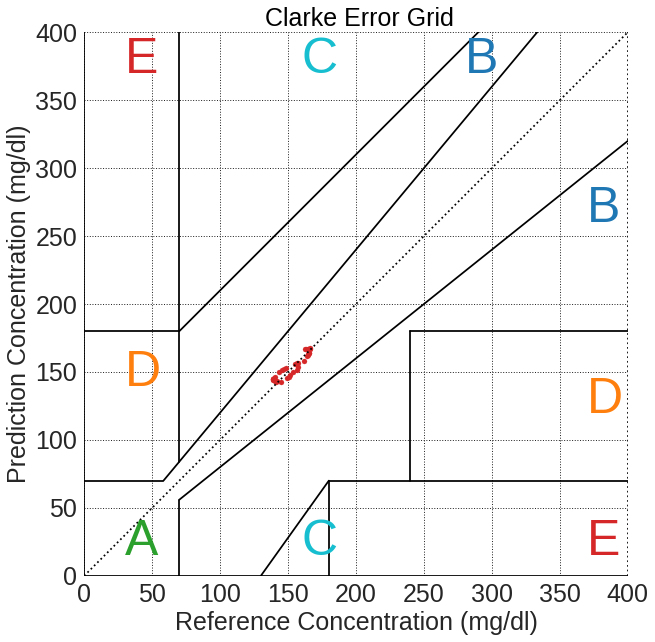

In [95]:
plt.figure(1, figsize=(10,10))
Y_pred = model.predict(X_test)
clarke_error_grid(y_test, Y_pred, '')

In [ ]:
clarke_error_zone_detailed(y_test, Y_pred)

In [66]:
parkes_error_zone_detailed(y_train, Y_pred, diabetes_type = 2)

ValueError: ignored

In [67]:
len(df)//len(glu_DSP)

1905

## Bland-Altman chart

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
colors = sns.color_palette("husl", 8)
colors = sns.color_palette("tab10")

#This function takes in the reference values and the prediction values as lists and returns a list with each index corresponding to the total number
#of points within that zone (0=A, 1=B, 2=C, 3=D, 4=E) and the plot
def blan_altman_plot(ref_values, pred_values, title_string, unit_string= '(mg/dl)'):

    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))

    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
    if max(ref_values) > 400 or max(pred_values) > 400:
        print("Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values)))
    if min(ref_values) < 0 or min(pred_values) < 0:
        print("Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values)))

    
    #Clear plot
    plt.clf()

    #Set up plot
    dif_values = pred_values - ref_values
    X= max(abs(min(ref_values)-0.5),abs(max(ref_values)+0.5))
    ampX = 50*(X//50 + 1)
    #xmin, xmax = min(ref_values)-0.5, max(ref_values)+0.5
    xmin, xmax = ampX-100, ampX
    
    Y= max(abs(min(dif_values)-1),abs(max(dif_values)+1))
    ampY = 5*(Y//5 + 2) #if (X%5!=0) else 5*(X//5) 
    ymin, ymax = -ampY, ampY
    # plot SD +/-1.96 SD and mean
    dif = pd.DataFrame(pred_values - ref_values)
    stat = dif.describe(percentiles = [0.05,0.5,0.95])[1:7].values.tolist()
    stat = [ item for x in stat for item in x ]  # flat the list [0.05, 0.5 and 0.95]

    plt.scatter(ref_values, dif_values, marker='o', color= colors[3], s=50)
    plt.title(title_string + " Bland-Altman Chart", color = 'black', fontsize = 25)
    plt.xlabel("Reference Concentration " + unit_string, fontsize = 25)
    plt.ylabel("The differnece value "+ unit_string, fontsize = 25)
    
    
    
    yticks = np.arange(ymin, ymax + 0.5, 5)
    plt.yticks(yticks, fontsize = 25)
    plt.tick_params(axis ='both', which ='both', length = 5)  # set tick marks
    xticks = np.arange(xmin, xmax + 0.5, 100/len(yticks))
    plt.xticks(xticks, fontsize = 25)
    #plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400],fontsize = 25)
    #plt.yticks([-20, -15, -10, -5, 0, 5, 10, 15, 20],fontsize = 25)
    #plt.grid()
    plt.gca().set_facecolor('white')

    #Set axes lengths
    plt.gca().set_xlim([xmin, xmax])
    plt.gca().set_ylim([ymin, ymax])
    plt.gca().set_aspect((xmax-xmin)/(ymax - ymin))
    plt.xticks()
    
    plt.grid(axis='both', linestyle=':', color='0.15')
    plt.plot([xmax, xmax], [ymin, ymax], '-', c='black')
    plt.plot([xmin, xmin], [ymin, ymax], '-', c='black')
    #plt.plot([xmin, xmax], [0, 0], ':', c='black')            # y_axis
    plt.plot([xmin, xmax], [ymin, ymin], '-', c='black')            # x_axis
    plt.plot([xmin, xmax], [ymax, ymax], '-', c='black')            # x_axis
    #plot +/-1.96 SD and mean
    plt.plot([xmin, xmax], [stat[3], stat[3]], '--', c='red')            # x_axis 
    plt.plot([xmin, xmax], [stat[5], stat[5]], '--', c='red')            # x_axis 
    plt.plot([xmin, xmax], [stat[0], stat[0]], '-', c='blue')            # x_axis 
    labels = ['-1.96 SD', 'mean', '+1.96 SD' ]
    values = [f"{x:.2f}" for x in stat ]
    #plt.annotate(s = labels, xy = (180, stat[0]))
    plt.text(xmax - 17, stat[3]+ 0.2, labels[0], fontsize=20, color =colors[3])
    plt.text(xmax - 10, stat[3]- 0.8, values[3], fontsize=20, color =colors[3])
    plt.text(xmax - 12, stat[0]+ 0.2, labels[1], fontsize=20, color ='blue')
    plt.text(xmax - 12, stat[0]- 0.8, values[0], fontsize=20, color ='blue')
    plt.text(xmax - 17, stat[5]+ 0.2, labels[2], fontsize=20, color =colors[3])
    plt.text(xmax - 10, stat[5]- 0.8, values[5], fontsize=20, color =colors[3])
    
    
    #Statistics from the data
    zone = [0] * 4
    for i in range(len(dif_values)):
        if (abs(dif_values[i]) <= 5):
            zone[0] += 1    #Zone A

        elif (abs(dif_values[i]) <= 10):
            zone[1] += 1    #Zone B

        elif (abs(dif_values) <=15):
            zone[2] += 1    #Zone C
        elif (abs(dif_values) <= 20):
            zone[3] += 1    #Zone D
        else:
            zone[4] += 1    #Zone B

    return plt, zone

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>,
 [26, 10, 0, 0])

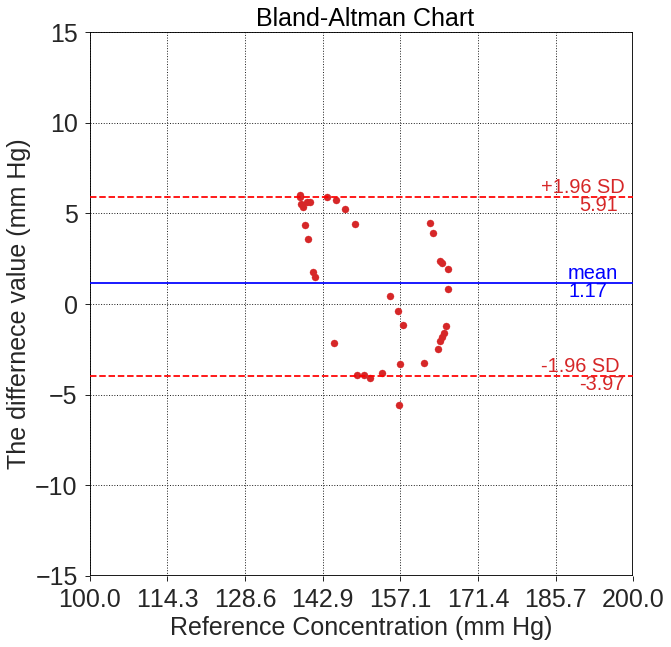

In [94]:
plt.figure(1, figsize=(10,10))
Y_pred = model.predict(X_test)
blan_altman_plot(y_test, Y_pred, '', '(mm Hg)')

In [ ]:
dif.describe()

In [269]:
dif = pd.DataFrame(Y_pred - y_test)
idx = [1,4,6]
stat = dif.describe(percentiles = [0.05,0.5,0.95])[1:7].values.tolist()

stat = [ item for x in stat for item in x ]
print(stat)

[0.4321756945847889, 1.852328209747015, -3.3556100379480256, -2.957926588845407, 0.856805812194267, 2.907535235636381]
